<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [3]:
#ANSWER:
bikes = pd.read_csv(r'C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\bikeshare.csv', header = 0)
print(bikes.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [4]:
#ANSWER:
print(bikes.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


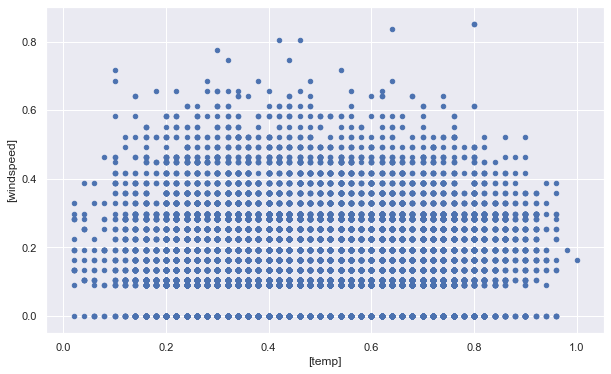

In [5]:
#ANSWER
bikes.plot.scatter(x=['temp'], y=['windspeed'])

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

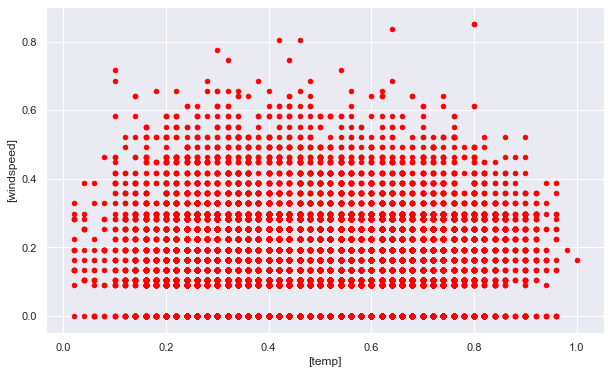

In [6]:
#ANSWER
bikes.plot.scatter(x=['temp'], y=['windspeed'], c='red')

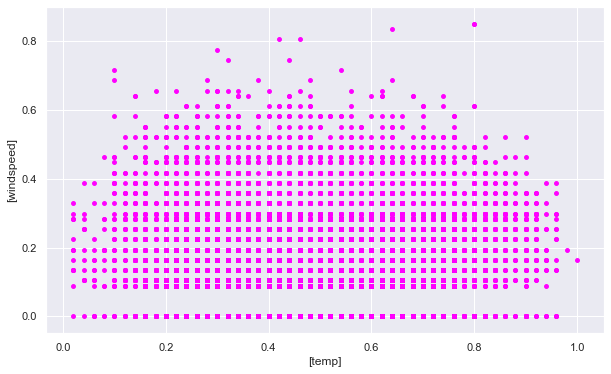

In [7]:
bikes.plot.scatter(x=['temp'], y=['windspeed'], s = 15, c='magenta')

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <a list of 10 Patch objects>)

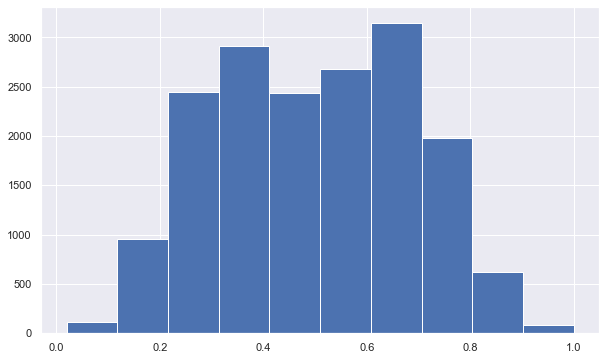

In [8]:
#ANSWER
x = bikes["temp"]
plt.hist(x)

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

{'whiskers': [<matplotlib.lines.Line2D at 0x24eeca81388>,
 'caps': [<matplotlib.lines.Line2D at 0x24eeca95a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24eeca8ce08>],
 'medians': [<matplotlib.lines.Line2D at 0x24eeca95f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24eeca9cf08>],
 'means': []}

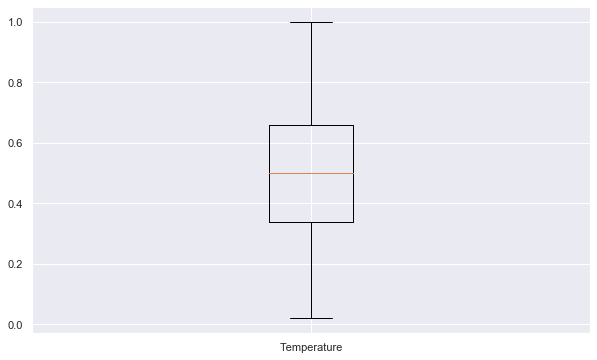

In [9]:
#ANSWER
x = bikes["temp"]
plt.boxplot(x, labels=["Temperature"])

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

{'whiskers': [<matplotlib.lines.Line2D at 0x24eecc29908>,
 'caps': [<matplotlib.lines.Line2D at 0x24eecb00d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24eecc383c8>,
 'medians': [<matplotlib.lines.Line2D at 0x24eecb06d08>,
 'fliers': [<matplotlib.lines.Line2D at 0x24eecb06e48>,
 'means': []}

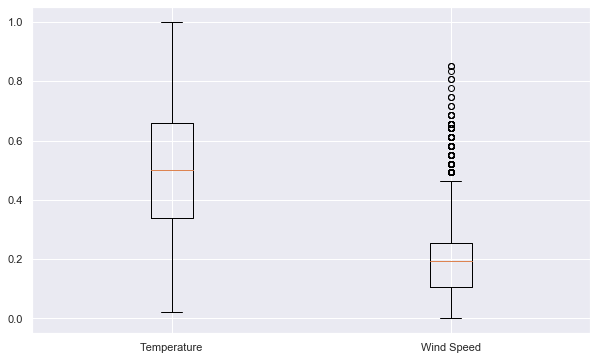

In [10]:
#ANSWER
x = bikes["temp"]
y = bikes["windspeed"]
plt.boxplot([x,y],labels=["Temperature","Wind Speed"])

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [4]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [12]:
#ANSWER
iris_data.head(2)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa

In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [13]:
#ANSWER
iris_data.groupby(["species"]).agg('count')

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [14]:
#ANSWER
iris_data.groupby(["species"]).agg('max')

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               5.8          4.4           1.9          0.6
Iris-versicolor           7.0          3.4           5.1          1.8
Iris-virginica            7.9          3.8           6.9          2.5

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [15]:
#ANSWER 
iris_data.groupby(["species"]).agg('mean')

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


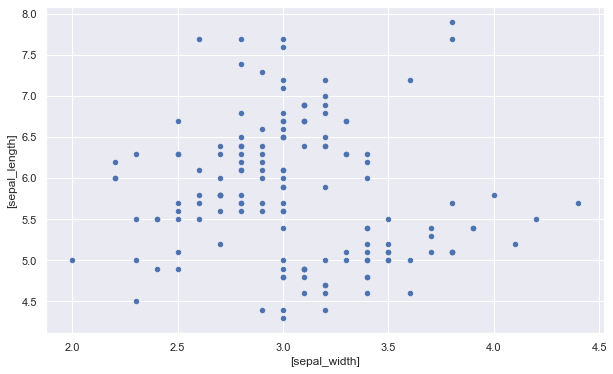

In [16]:
#ANSWER
x= iris_data["sepal_width"]
y = iris_data["sepal_length"]
iris_data.plot.scatter(["sepal_width"],["sepal_length"])

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

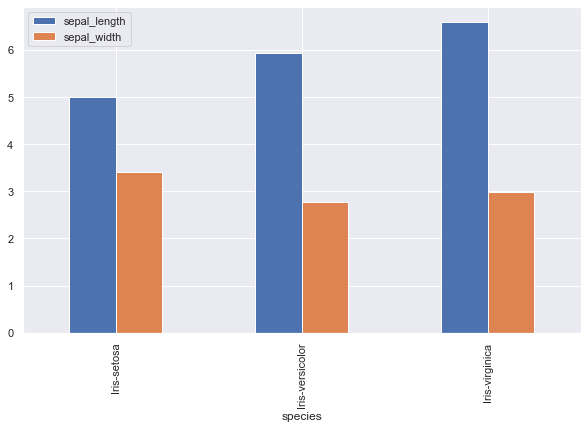

In [6]:
#ANSWER
# Requires review
#iris_data.groupby(["sepal_width"]).plot.bar() 

#ANSWER 
# Create new groupby dataset for bar graph
### From the Solutions notebook

_group_by = ['species']

_agg = {
    'sepal_length': 'mean'
    , 'sepal_width': 'mean' 
}

iris_data_groupby = iris_data.groupby(by=_group_by).agg(_agg)
iris_data_groupby.plot(kind='bar');

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

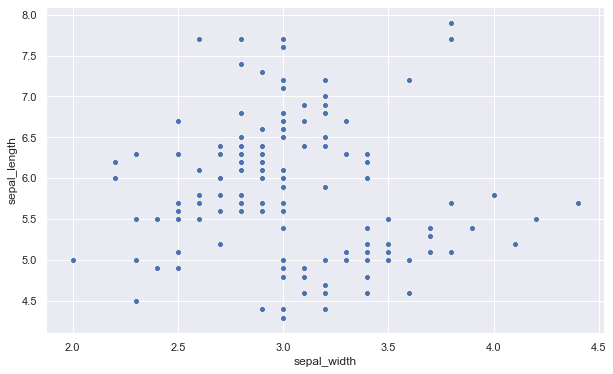

In [18]:
#ANSWER
x= iris_data["sepal_width"]
y = iris_data["sepal_length"]
sns.scatterplot(x,y)

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

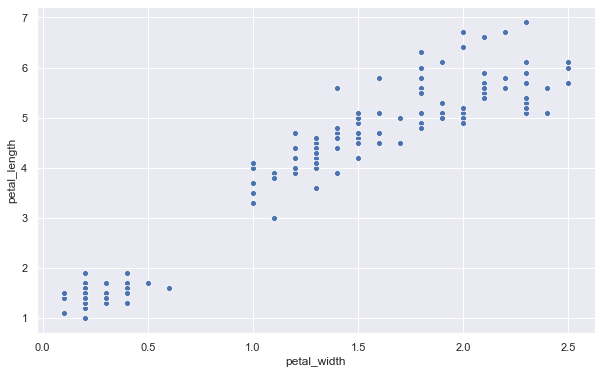

In [19]:
#ANSWER
x= iris_data["petal_width"]
y = iris_data["petal_length"]
sns.scatterplot(x,y)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

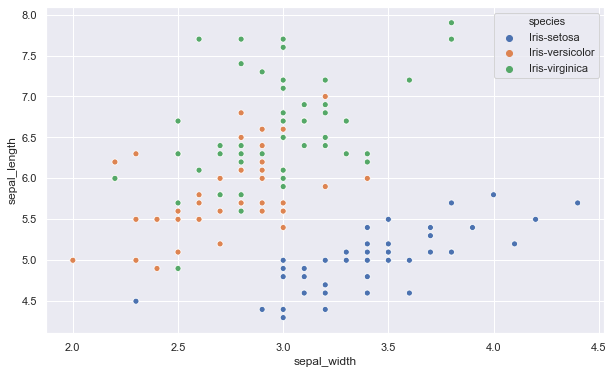

In [20]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
# using Seaborn
x= iris_data["sepal_width"]
y = iris_data["sepal_length"]
sns.scatterplot(x,y,hue=iris_data["species"])

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

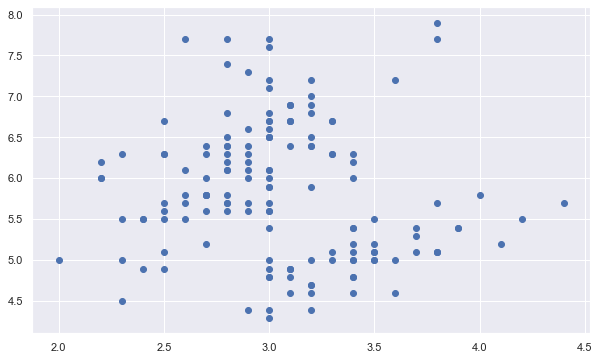

In [21]:
# ANSWER
# using matplotlib 
x= iris_data["sepal_width"]
y = iris_data["sepal_length"]
plt.scatter(x,y,)

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

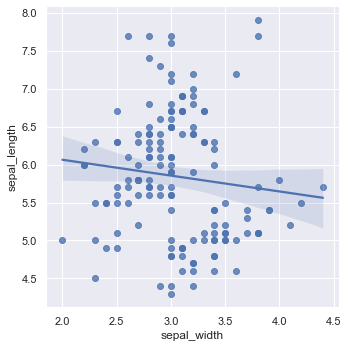

In [22]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot("sepal_width","sepal_length", iris_data)

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

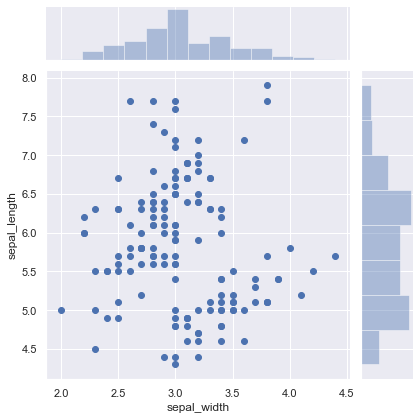

In [23]:
# ANSWER
sns.jointplot("sepal_width","sepal_length", iris_data)

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

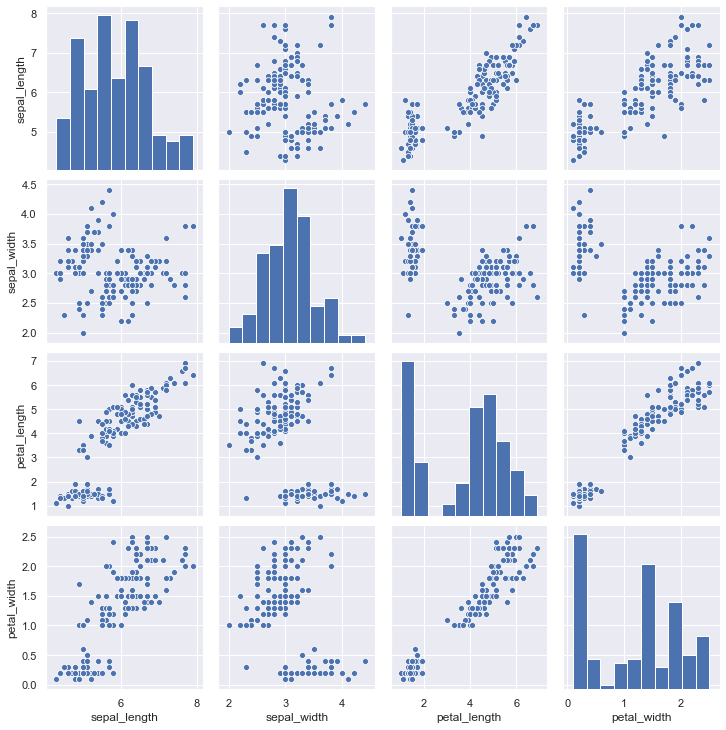

In [24]:
# ANSWER
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

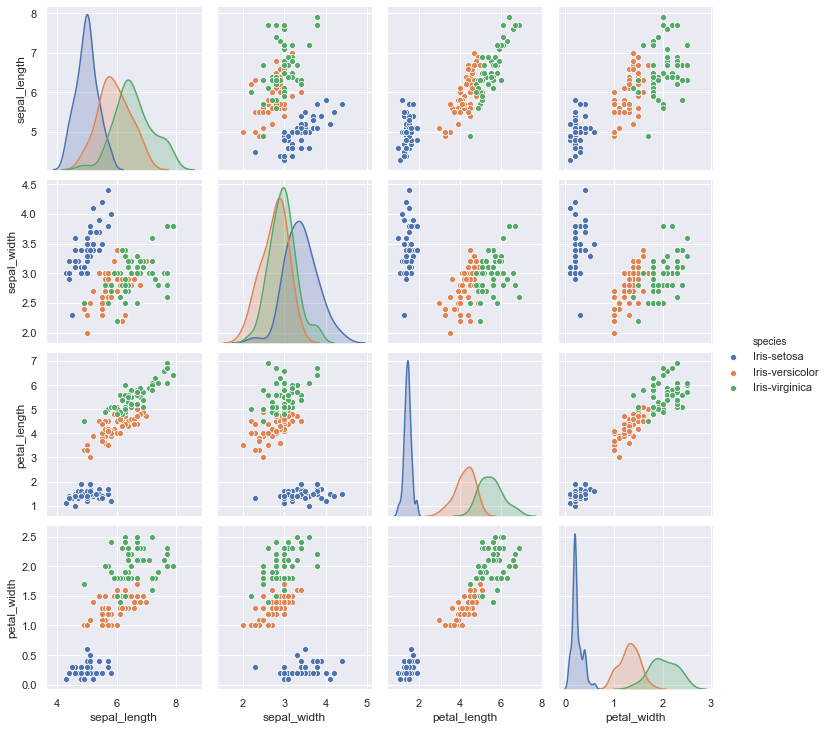

In [25]:
# ANSWER
sns.pairplot(iris_data,hue="species")

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [5]:
# ANSWER
iris_data.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [6]:
# ANSWER
import pandas_profiling as pp
df = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

ModuleNotFoundError: No module named 'pandas_profiling'

Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [0]:
# ANSWER
#pp.ProfileReport(df)

##CODE not run because of corruption of notebook

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [7]:
airpass = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\AirPassengers.csv")
airpass.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [8]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [11]:
# ANSWER
# Remember to datetime is panda function
airpass["Month"]= pd.to_datetime(airpass['Month'],format='%Y/%m')

Set `Month` as index

In [12]:
# ANSWER
airpass.set_index("Month", inplace=True)

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [13]:
# ANSWER
airpass.head(2)

Passengers
Month                 
1949-01-01         112
1949-02-01         118

Here's how to see the values of the index:

In [14]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [15]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [16]:
# Wrong argument for this function

print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [17]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [18]:
print(ts['1949'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

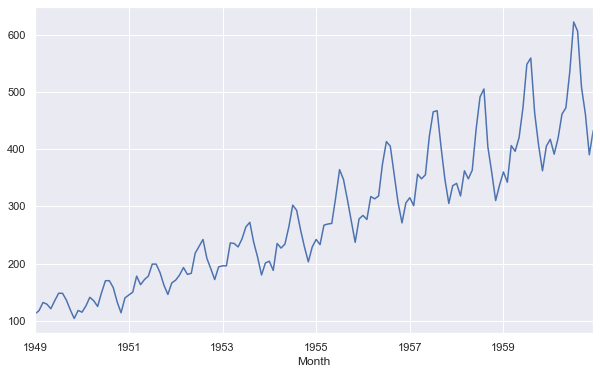

In [19]:
# Index as date works
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [3]:
import folium

In [4]:
# Read SF Incidents data
crime_csv = 'SFPD_Incidents_-_Current_Year__2015_.csv'
crime = pd.read_csv(r'C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\SFPD_Incidents_-_Current_Year__2015_.csv', header = 0)
print(crime.head())

   IncidntNum      Category                         Descript DayOfWeek  \
0   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1   150827213       ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   
3   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)    Sunday   
4   150827213       ASSAULT              MAYHEM WITH A KNIFE    Sunday   

         Date   Time PdDistrict      Resolution                   Address  \
0  09/20/2015  23:54   RICHMOND       UNFOUNDED  3000 Block of CLEMENT ST   
1  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
2  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
3  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
4  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   

            X          Y                               Location  
0 -122.491851  37.781756  

Convert `Date` Column to DateTime and set as index 

In [5]:
# ANSWER
crime["Date"]= pd.to_datetime(crime["Date"]) 
crime.set_index("Date", inplace= True)

Draw a timeseries plot to visualize number of crimes for each day.

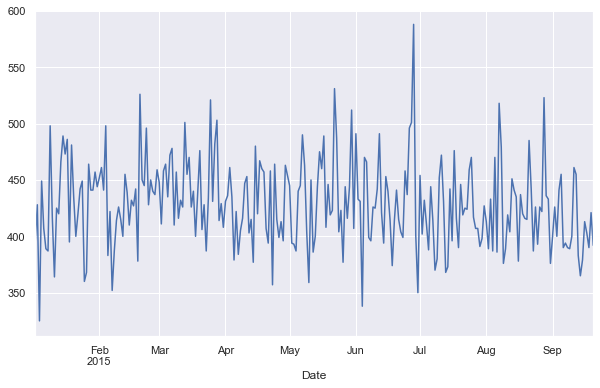

In [6]:
# ANSWER
# From the solutions notebook
crime.groupby(crime.index).size().plot();

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [7]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [8]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

In [9]:
# ANSWER
for i in range(0,100):
    folium.Marker([crime.iloc[i]['Y'], crime.iloc[i]['X']], popup=crime.iloc[i]['Descript']).add_to(base_map)
base_map.save("crimeSF_Maker.html")
display(base_map)

Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [10]:
# ANSWER
# Re-generate the base map
baseMap = folium.Map(location=[37.76, -122.45])

# use the circle function
for i in range(0, len(crime.head(100))):
    folium.Circle(
        location=[crime.iloc[i]['Y'], crime.iloc[i]['X']], popup=crime.iloc[i]['Descript']
        , radius=50, color="crimson"
    ).add_to(baseMap)
display(baseMap)

[BONUS] Create a heatmap of the incident happened in SF.

In [11]:
from folium.plugins import HeatMap

# Re-generate the base map
base_map = generateBaseMap(default_location=[37.76, -122.45])

# Ensure you're handing it floats
crime['Y'] = crime['Y'].astype(float)
crime['X'] = crime['X'].astype(float)

# Setup our heatmap layer
heatMap = HeatMap(zip(crime["Y"].values, crime["X"].values),
                    min_opacity=0.2,
                    radius=17, blur=15,
                    max_zoom=1
                 )

base_map.add_child(heatMap)

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

** GeoPanda requires descartes library to function. This library was not loaded.

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [0]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



